# Clustering
- 2020-2 Artifitial Intelligence  
- week2 Assignment  
- Updated 0913
- 워드 임베딩 값으로 클러스터링 진행
- 단어 한 줄이 하나의 문서라고 생각하고 tf-idf 진행

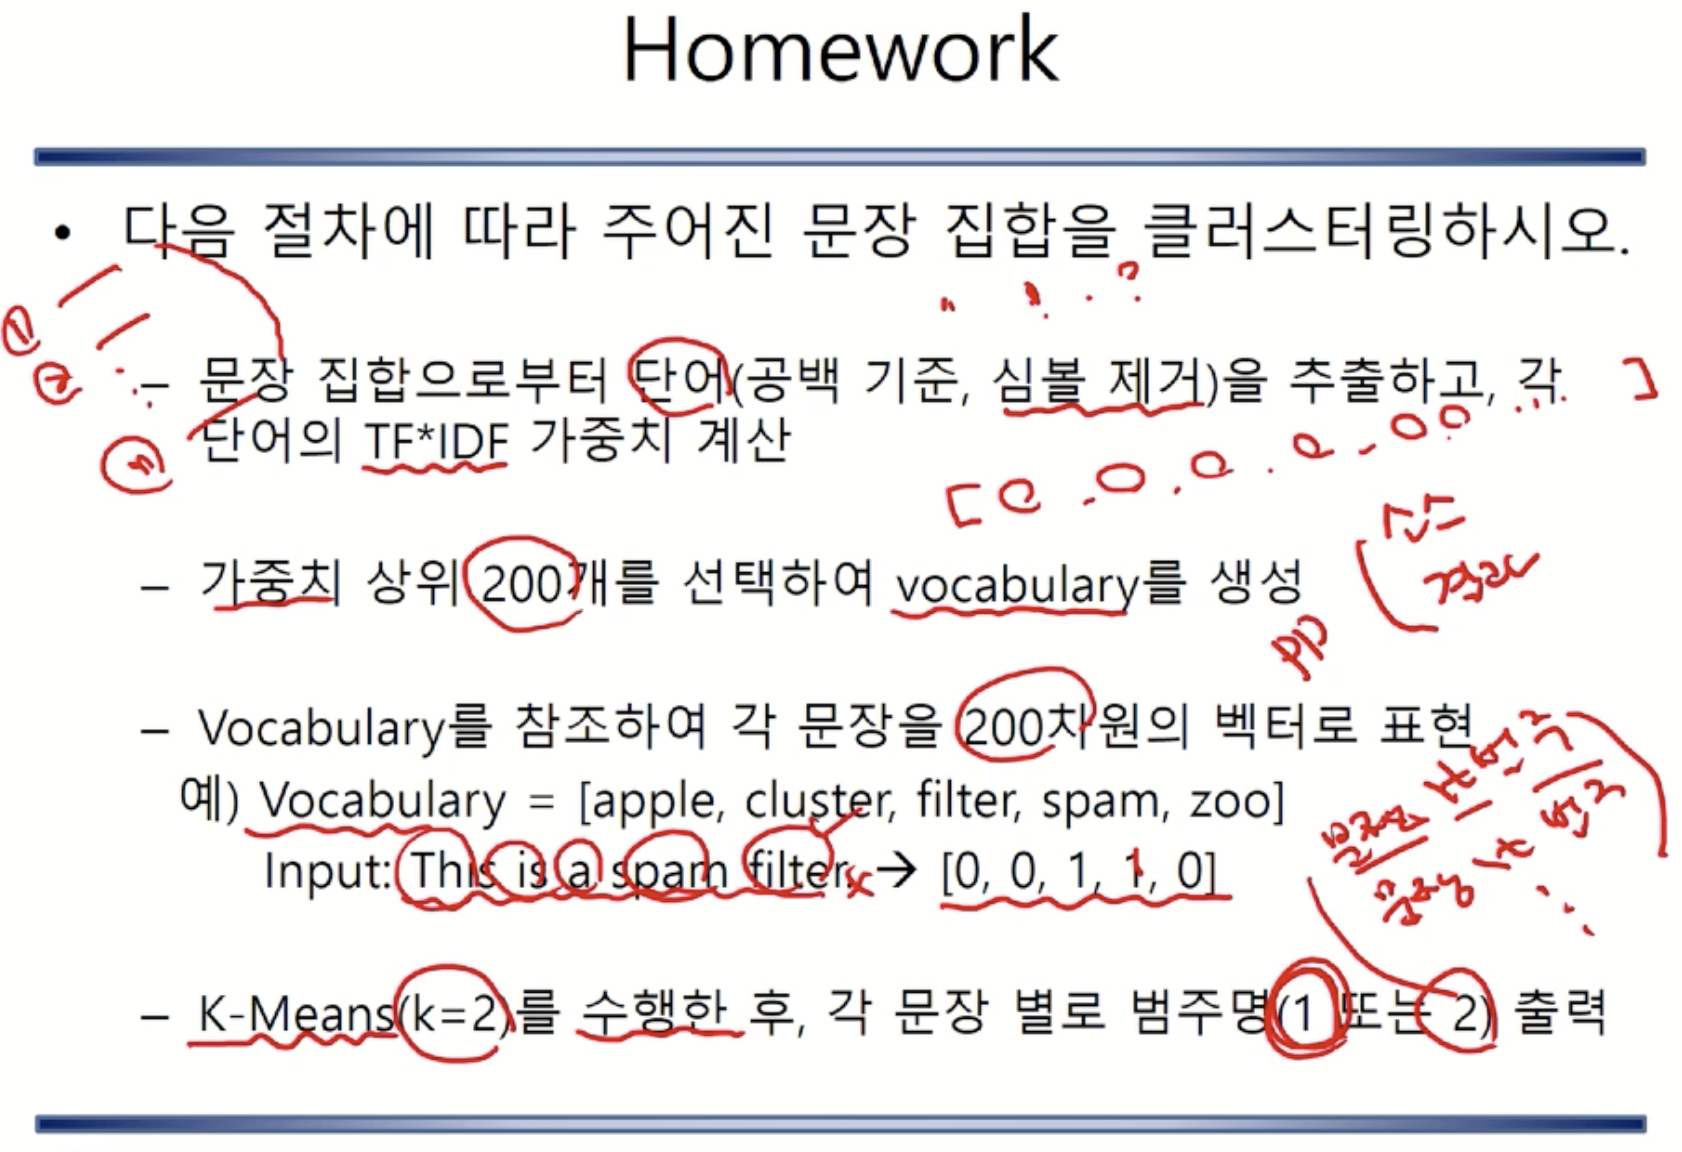

In [1]:
# ready
import pandas as pd
import numpy as np

import sys
np.set_printoptions(threshold=sys.maxsize)
import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import display
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

### step1. Load data
텍스트를 불러들일 때, 모두 소문자로 바꿔서 리스트로 저장한다.  
대소문자가 달라도 같은 단어로 인식하기 위함.

In [2]:
data = []
with open("data/SMS_dataset.txt","r") as f:
  for i in f.readlines():
    i = i.lower()     # 소문자 변환
    data.append(i[:-1])
data[:5]      # 한 문장씩 불러와서 저장
#data = ' '.join(data)

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though"]

### step2. 특수문자를 없애준다.  
상대적으로 단어중요도구하기라는 목적에 부합하지 않은 것 같아서 제거

In [3]:
import re
import string

data = [i.translate(str.maketrans('','',string.punctuation)) for i in data]
data[:5]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though']

### step3. tokenizing
단어를 하나씩 띄어쓰기 단위로 쪼갠다.   
이 때 문장별로 단어를 리스트로 저장해놓음

In [4]:
processed_data = [[w for w in d.split()] for d in data]
processed_data[:5]    # 5 문장 확인

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'],
 ['nah',
  'i',
  'dont',
  'think',
  'he',
  'goes',
  'to',
  'usf',
  'he',
  'lives',
  'around',
  'here',
  'though']]

### step4. tf-idf
tokenizing 한 문장별 단어 리스트를 넣으면 자동으로 단어별 스코어를 구한다.  
각 단어별로 tf-idf 값 리턴.  

In [5]:
# t는 토큰 (단어), D는 문서(문장)들, d는 문서(문장) 한 개 
def tf(t,d):
    return d.count(t)

def idf(t,D):
    n = len(D)
    df = len([True for d in D if t in d])
    return np.log(n/df)

def tfidf(t,d,D):
    return tf(t,d) * idf(t,D)

def tfidfScoring(D):
    # processed_data 토큰된 문장 리스트
    result = []
    for d in processed_data:
        result.append([(t, tfidf(t,d,processed_data)) for t in d ])
    return result

In [6]:
df = []
for i, doc in enumerate(tfidfScoring(processed_data)):
    #print('====== document[%d] ======' % i)
    #print(doc)
    df.extend(doc)

### step5. Vocabulary 생성
weight 상위 200개 단어로 생성

In [7]:
len(df)

84980

In [22]:
# weight dataframe group by
# 동일한 단어에 대한 가중치를 합해준다.
df.sort(key = lambda x: -x[1])
weight = pd.DataFrame(df, columns=['word','weight'])
# groupby
clean = weight.groupby('word')['weight'].sum().reset_index()
clean = clean.sort_values('weight', ascending = False)
clean

,word,weight
9430,you,5362.095574
4328,i,5174.441534
8426,to,4561.640030
8640,u,4145.273773
8282,the,3716.718339
...,...,...
5810,nightnobody,8.625509
5809,nightnight,8.625509
5808,nighters,8.625509
5806,nigh,8.625509


In [27]:
# weight 상위 200개 단어로 만든 corpus
voca = clean.word[:200]
voca200 = np.array(voca.tolist())
voca200, len(voca)

(array(['you', 'i', 'to', 'u', 'the', 'a', 'my', 'and', 'it', 'is', 'ltgt',
        'me', 'in', 'for', 'your', 'ur', 'of', '2', 'do', 'that', 'have',
        'on', 'call', 'are', 'be', 'can', 'd', 'im', 'if', 'happy', 'will',
        'so', 'free', 'now', 'we', 'not', 'but', 'with', 'at', 'or', 'get',
        'he', 'this', 'dont', 'was', 'when', 'just', 'no', 'its', 'she',
        '4', 'go', 'up', 'all', 'out', 'how', 'know', 'like', 'from', 'hi',
        'love', 'ok', 'what', 'as', 'good', 'day', 'come', 'there', 'got',
        'n', 'then', 'am', 'ill', 'text', 'time', 'only', 'her', 'who',
        'stop', 'one', 'lor', 'about', 'r', 'want', 'face', 'by', 'send',
        'they', 'mobile', 'da', 'txt', 'need', 'going', 'x', 'sorry',
        'reply', 'back', 'our', 'home', 'cant', 'week', 'still', 'see',
        'dear', 'has', 'tell', 'pls', 'amp', 'been', 'new', 'night',
        'today', 'did', 'later', 'him', 'should', 'think', 'any', 'well',
        'great', 'please', 'missing', 'an',

### step6. 각 문장을 벡터로 표현
vocabulary를 참조하여 각 문장을 200차원의 벡터로 표현

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(voca200)     # 단어사전에 fitting

CountVectorizer()

In [33]:
doc_array = count_vector.transform(data).toarray()
doc_array[:2]      # 문장별로 count 한 array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
  

In [34]:
doc_array.sum()      # 확인

42230

### step7. Kmeans Clustering
k=2로 클러스터링하고 범주 (1 or 2) 를 뽑는다. 

In [35]:
# sklearn
from sklearn.cluster import KMeans

In [36]:
km = KMeans(n_clusters=2, random_state=42)

In [37]:
# kmeans 로 분류한 범주 
predict = km.fit_predict(doc_array)
predict

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
# 범주를 1 또는 2로 나타냄 : (0 or 1) -> (1 or 2) 
category = predict + 1

In [39]:
category

array([2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [40]:
len(predict),len(category), len(data)     # 문장 수와 범주 수 동일

(5572, 5572, 5572)

step1 ~ step7 에 걸쳐서 단어를 tfidf 로 임베딩하고 kmeans 알고리즘으로 문장별로 분류했다.  
문장별로 1 또는 2의 범주로 분류 되었음.  
시각화 해볼까 했는데 문장별로 200차원이여서 t-sne를 써야할 것 같아서 패스한다.